In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn; seaborn.set()
from datetime import datetime
# the seaborn makes things prettier

## Beatrice,
In addition to some sample things I did above and below to clean teh data to use here:
We need an additional column that adds up teh chronic illnesses. And performs an analysis on their sum.
We need to perform versions of the these analyses for % data:
We need the % of chronic illnesses in total natural deaths, and we need the % allocation of each illness within the year to different months.
Additionally, all number columns must be ints. If you review this file, you will see whatever I did when the need arose. (I needed to group by months and years so I kept that data....)

## Melanie,
I did some sample analysis which can be in some form applied to all data once it is prepared - see what you think and maybe you can improve on these while you apply them to prepared data?

Please note that you need to update path of the source file for this file to run - and it will save plots to yoru save location in a loop!!! as shown on line 6. 

In [50]:
# using one of the unclean files for now. YOU NEED TO UPDATE THE PATH TO RUN THIS FILE!!!

path = "Jupyter_Notebooks_and_Data/Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv"


data = pd.read_csv(path, parse_dates=True)
data["Year"] = data["Year"].astype(str)
data["Month"] = data["Month"].astype(str)
data["date"] = data["Year"] + " " + data["Month"]
data.date = data["date"].map(lambda x: datetime.strptime(x,"%Y %m"))
data["Time_Axis"] = data["date"].map(lambda x: datetime.strftime(x,"%Y-%b"))
data = data.set_index(["Time_Axis"])
data = data.sort_values(by ="date")
data = data.drop(columns=["All Cause","Jurisdiction of Occurrence", "date", "Drug Overdose","Assault (Homicide)", "Intentional Self-Harm (Suicide)", "Motor Vehicle Accidents", "Accidents (Unintentional Injuries)"])
data.head(7)


,Year,Month,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases
Time_Axis,,,,,,,,,,,,,,
2014-Jan,2014,1,226621,3944,51101,7344,8305,7929,15078,3466,4600,2815,58229,12074
2014-Feb,2014,2,197001,3214,45558,6443,7315,5561,12747,2873,4064,2532,50435,10780
2014-Mar,2014,3,212045,3451,50646,6738,7999,5148,13493,3260,4300,2632,54347,11395
2014-Apr,2014,4,199454,3125,48304,6343,7117,4512,12573,3179,3902,2549,50954,10773
2014-May,2014,5,199843,3105,49497,6272,7266,4099,12281,3101,3980,2584,50810,10963
2014-Jun,2014,6,187644,2947,48103,5802,6755,3658,11207,2782,3631,2518,47144,9973
2014-Jul,2014,7,192035,3112,49259,5983,6990,3535,11161,2690,3690,2449,47991,10449


In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
# We can use any of the ones here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# plt.style.use('ggplot') is popular

In [4]:
column_count = data.shape[1]
i = 2 # i is our starting column, as we will not plot the months and years
while i < column_count:
    data.iloc[:,i] = data.iloc[:,i].astype(int)
    i=i+1

In [5]:
data.columns.values[3] # this function returns columns names, which are useful for automatic usage of column names in titles and legends

'Septicemia'

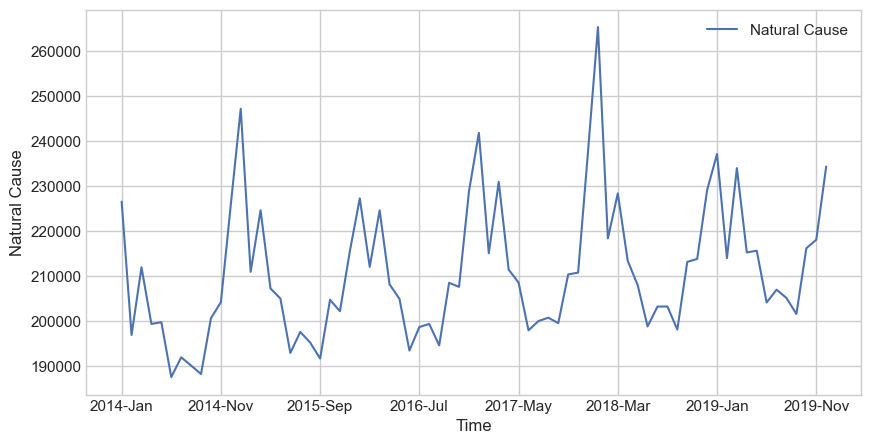

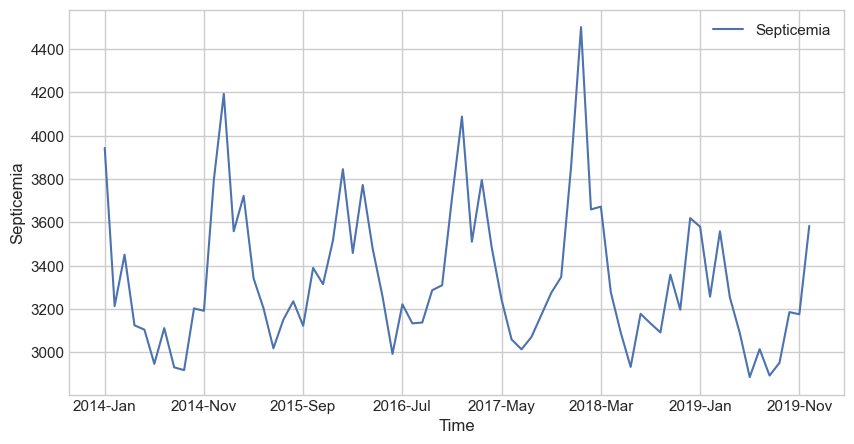

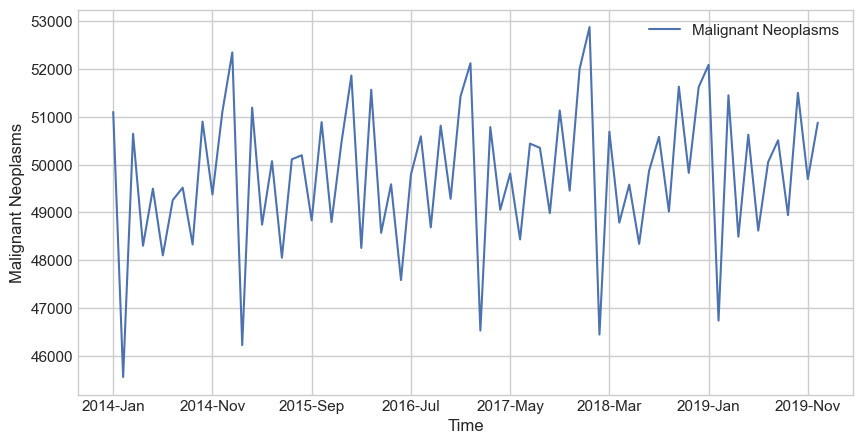

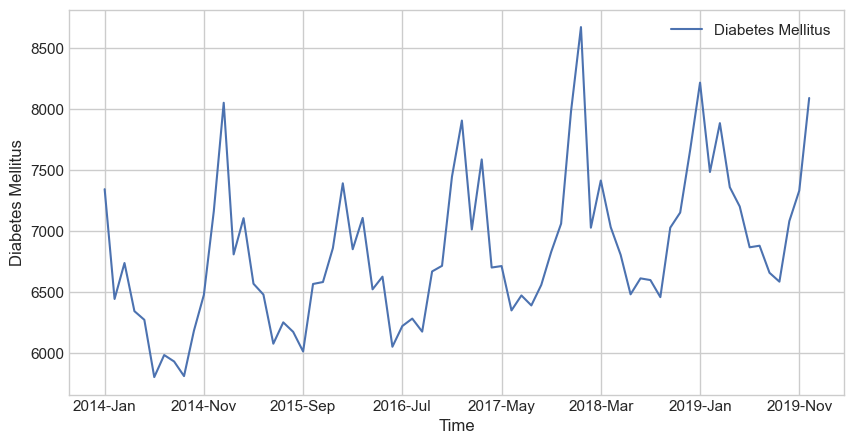

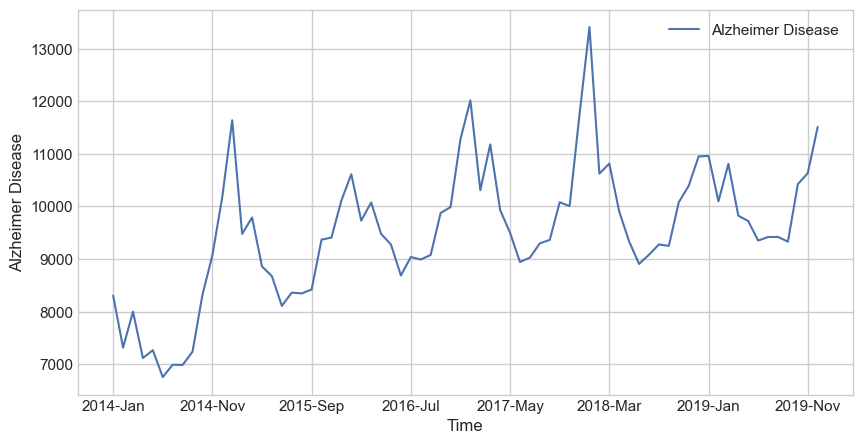

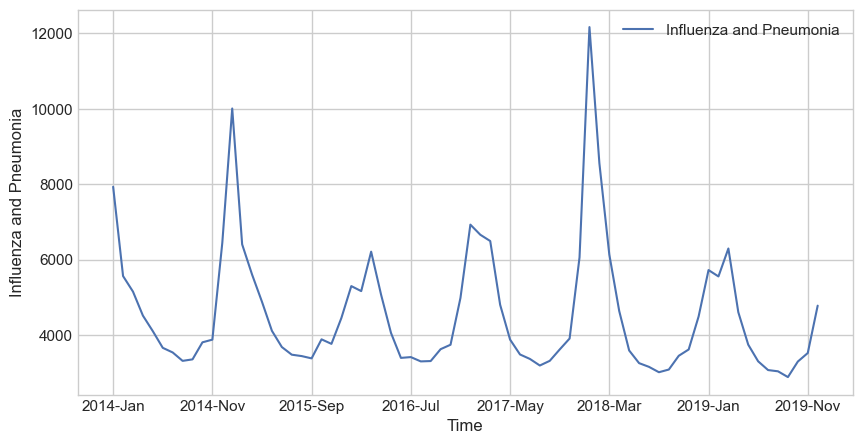

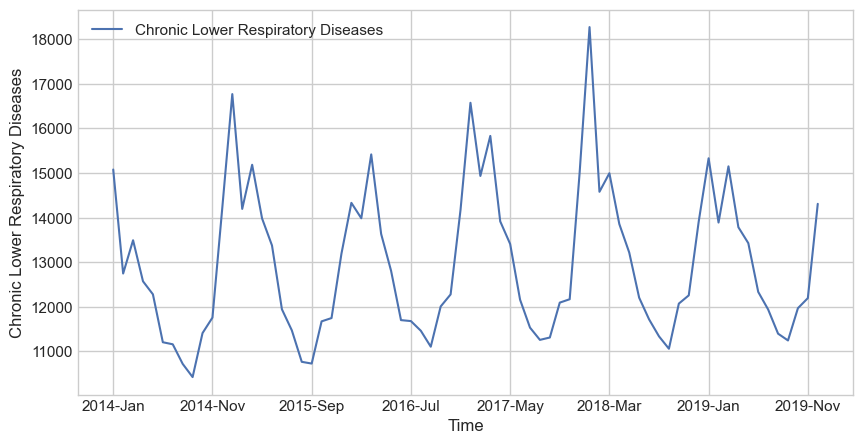

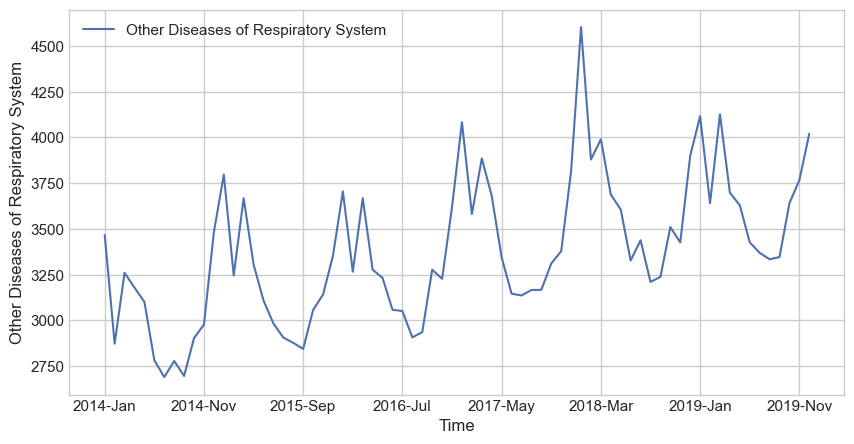

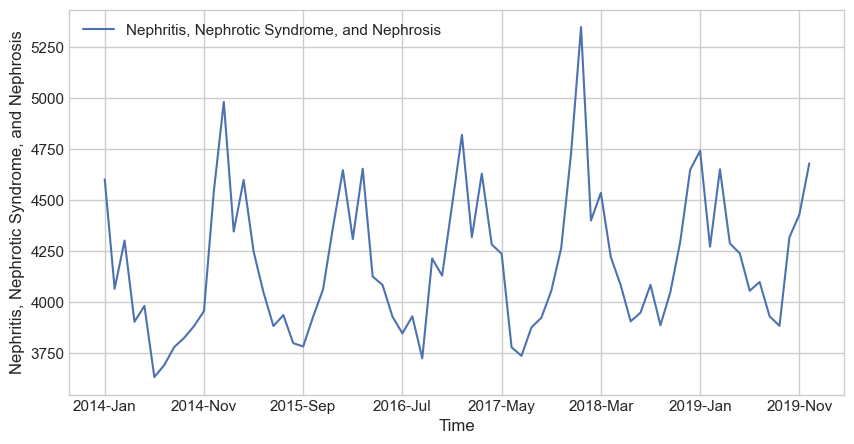

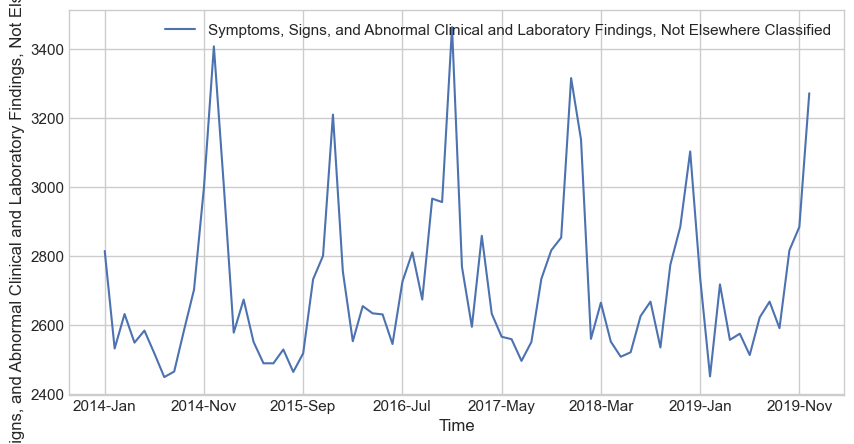

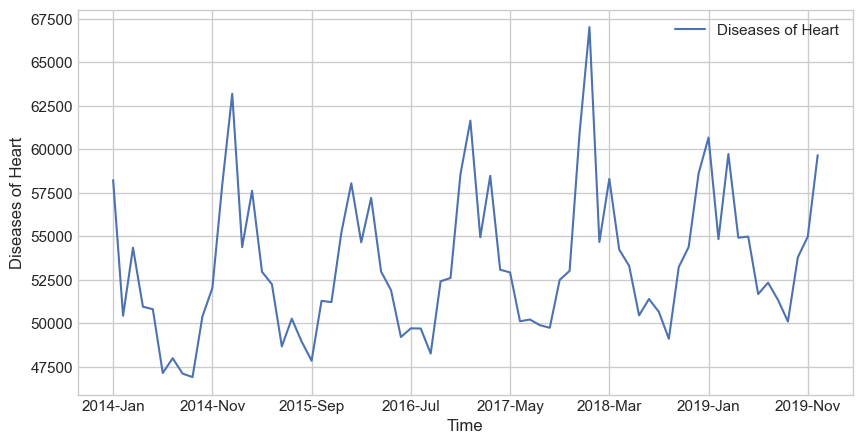

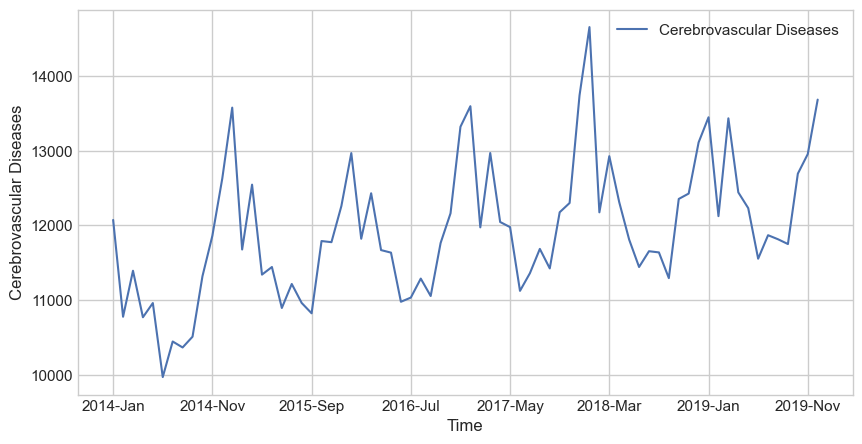

In [6]:
column_count = data.shape[1]
i = 2 # i is our starting column, as we will not plot the months and years
while i < column_count:
    name = data.columns.values[i]
    data.plot( y = i, xlabel = "Time", ylabel = data.columns.values[i], figsize=(10, 5)); # a line plot of all of the data input
    plt.savefig(name, format="pdf" )
    i=i+1
# Assumes that column names are properly formatted
#df.plot(kind="bar", figsize=(9, 8))
#df.plot(style = [':', '--', '-'])
#births.pivot_table('births','dayofweek','decade', aggfunc='mean').plot();

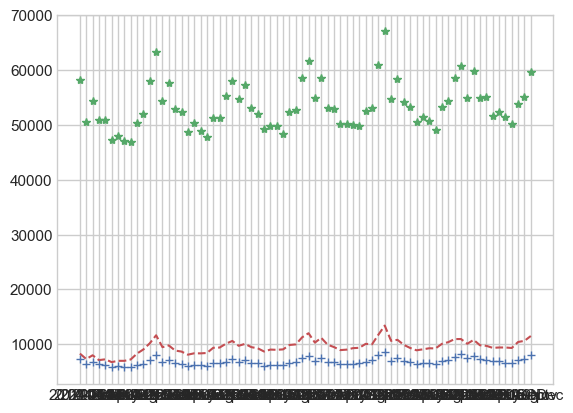

In [7]:
plt.plot(data["Alzheimer Disease"], 'r--', data["Diabetes Mellitus"], 'b+', data["Diseases of Heart"], 'g*');

Text(0, 0.5, 'Alzheimer Disease')

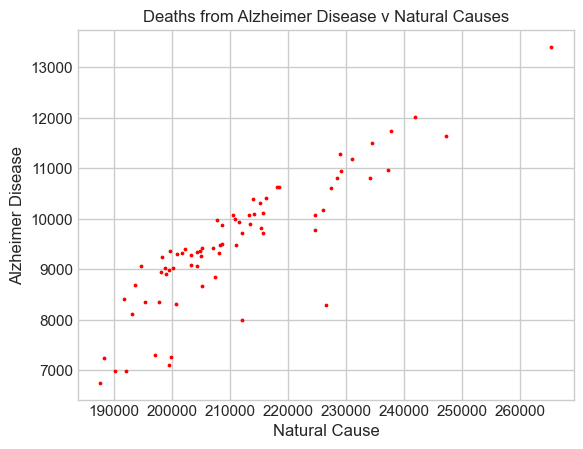

In [8]:
plt.scatter(data["Natural Cause"], data["Alzheimer Disease"], alpha = 1, s = 3, c = "red"); # s for size and c for color
plt.title('Deaths from Alzheimer Disease v Natural Causes')
plt.xlabel('Natural Cause')
plt.ylabel('Alzheimer Disease')

In [32]:
by_year = data.reindex()
by_year.set_index(["Year", "Month"], inplace=True)
by_year.head()


Natural Cause  Septicemia  Malignant Neoplasms  Diabetes Mellitus  \
Year Month                                                                      
2014 1             226621        3944                51101               7344   
     2             197001        3214                45558               6443   
     3             212045        3451                50646               6738   
     4             199454        3125                48304               6343   
     5             199843        3105                49497               6272   

            Alzheimer Disease  Influenza and Pneumonia  \
Year Month                                               
2014 1                   8305                     7929   
     2                   7315                     5561   
     3                   7999                     5148   
     4                   7117                     4512   
     5                   7266                     4099   

            Chronic Lower Respiratory Diseases  \
Year Month                                       
2014 1                                   15078   
     2                                   12747   
     3                                   13493   
     4                                   12573   
     5                                   12281   

            Other Diseases of Respiratory System  \
Year Month                                         
2014 1                                      3466   
     2                                      2873   
     3                                      3260   
     4                                      3179   
     5                                      3101   

            Nephritis, Nephrotic Syndrome, and Nephrosis  \
Year Month                                                 
2014 1                                              4600   
     2                                              4064   
     3                                              4300   
     4                                              3902   
     5                                              3980   

            Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified  \
Year Month                                                                                             
2014 1                                                   2815                                          
     2                                                   2532                                          
     3                                                   2632                                          
     4                                                   2549                                          
     5                                                   2584                                          

            Diseases of Heart  Cerebrovascular Diseases  
Year Month                                               
2014 1                  58229                     12074  
     2                  50435                     10780  
     3                  54347                     11395  
     4                  50954                     10773  
     5                  50810                     10963

<Axes: xlabel='Year,Month'>

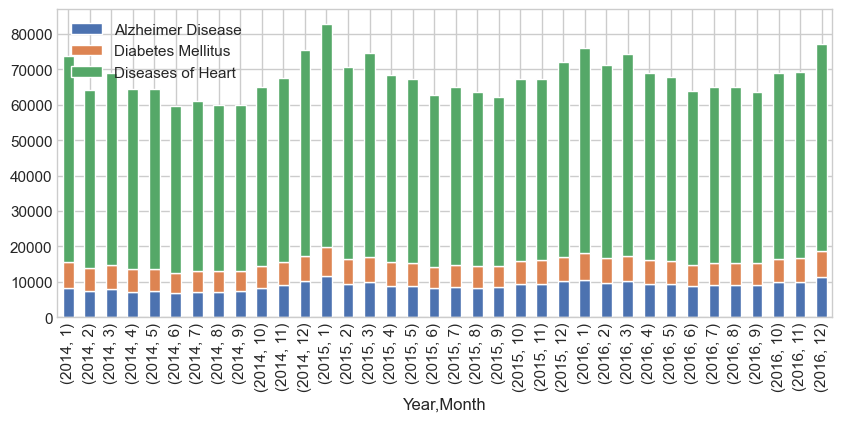

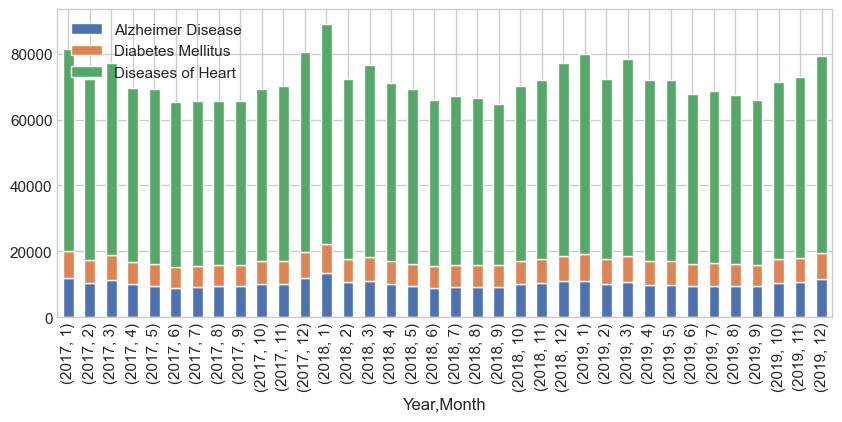

In [48]:
idx = pd.IndexSlice # I had to look this up to see how to slice MultiIndex
by_year.loc[idx[["2014","2015","2016"],:],:].plot.bar(y = ["Alzheimer Disease", "Diabetes Mellitus", "Diseases of Heart"], stacked = True, figsize = (10,4))
by_year.loc[idx[["2017","2018","2019"],:],:].plot.bar(y = ["Alzheimer Disease", "Diabetes Mellitus", "Diseases of Heart"], stacked = True, figsize = (10,4))

#A = df.loc[:,idx[:,'A']]
